<a href="https://colab.research.google.com/github/gansuhmgl/hello-world/blob/master/GA_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def _fitness(x):
  if x>-11 and x<11:
    y = (x**2+x)*np.cos(2*x) + x**2
    return round(y,6)
  else:
    return 0

def mutate(parents, fitness_function):
  n=int(len(parents))
  scores = fitness_function(parents)
  idx = scores >0
  scores = scores[idx]
  parents = np.array(parents)[idx]
  children = np.random.choice(parents, size=n, p=scores/scores.sum())
  children = children +np.random.uniform(-0.51,0.51,size=n)
  return children.tolist()

def _get_fittest_parent(parents, fitness):
  _fitness = fitness(parents)
  PFitness =list(zip(parents, _fitness))
  PFitness.sort(key = lambda x: x[1], reverse=True)
  best_parent, best_fitness = PFitness[0]
  return round(best_parent, 4), round(best_fitness, 4)

def GA(parents, fitness_function, popsize=100, max_iter = 100):
  History = []
  best_parent, best_fitness = _get_fittest_parent(parents, fitness)
  print('generation {}| best fitness {}| current fitness {} | current_parent {}'.format(0, best_fitness, best_fitness, best_parent))

  x = np.linspace(start=-20, stop=20, num=200)
  plt.plot(x, fitness_function(x))
  plt.scatter(parents,fitness_function(parents), marker='x')

  for i in range(1, max_iter):
    parents = mutate(parents, fitness_function=fitness_function)

    curr_parent, curr_fitness = _get_fittest_parent(parents, fitness_function)

    if curr_fitness > best_fitness:
      best_fitness = curr_fitness
      best_parent = curr_parent
    
    curr_parent, curr_fitness = _get_fittest_parent(parents, fitness_function)

    if i%10 ==0:
      print('generation {}| best fitness {}| current fitness {}| current_parent {}'.format(i, best_fitness, curr_fitness, curr_parent))
    History.append((i, np.max(fitness_function(parents))))
  
  plt.scatter(parents, fitness_function(parents))
  plt.scatter(best_parent, fitness_function(best_parent), marker='.', c='b', s=200)
  plt.pause(0.09)
  plt.ioff()

  print('generation {}| best fitness {}| best_parent {}'.format(i, best_fitness, best_parent))

  return best_parent, best_fitness, History




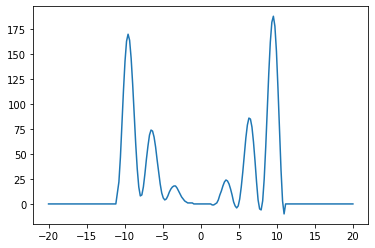

In [59]:
x = np.linspace(start=-20, stop=20, num=200)
plt.plot(x,fitness(x))

In [65]:
x = np.linspace(start=-20, stop=20, num=200)
init_pop = np.random.uniform(low=-20, high=20, size=200)

generation 0| best fitness 188.8609| current fitness 188.8609 | current_parent 9.5453
generation 10| best fitness 188.9709| current fitness 188.9683| current_parent 9.5184
generation 20| best fitness 188.9709| current fitness 188.9659| current_parent 9.517
generation 30| best fitness 188.9709| current fitness 188.9708| current_parent 9.5228
generation 40| best fitness 188.9709| current fitness 188.9709| current_parent 9.522
generation 50| best fitness 188.9709| current fitness 188.9709| current_parent 9.5221
generation 60| best fitness 188.9709| current fitness 188.9702| current_parent 9.5238
generation 70| best fitness 188.9709| current fitness 188.9709| current_parent 9.5218
generation 80| best fitness 188.9709| current fitness 188.9709| current_parent 9.5221
generation 90| best fitness 188.9709| current fitness 188.9666| current_parent 9.5266


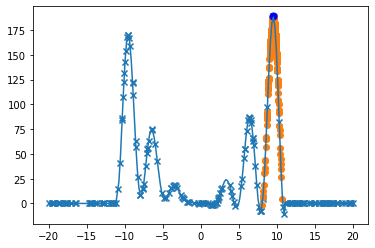

generation 99| best fitness 188.9709| best_parent 9.5224
top parent 9.5224, top fitness 188.9709


In [66]:
parent_, fitness_, history_ = GA(init_pop, fitness)
print('top parent {}, top fitness {}'.format(parent_, fitness_))

Text(0, 0.5, 'Fitness')

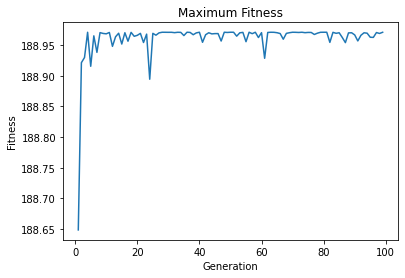

In [67]:
x, y = list(zip(*history_))
plt.plot(x, y)
plt.title('Maximum Fitness')
plt.xlabel("Generation")
plt.ylabel("Fitness")